# Float $Y_i$ & Float $\alpha_{MLT}$

First, we load the appropriate libraries and data file. MCMC trials where all quantities are permitted to float happened during Run 05. Note that the metallicity uncertainty for those measurements where no observational uncertainties were provided, are assumed to be ±0.2 dex.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('data/run05_kde_props_tmp3.txt')
data = np.array([x for x in data if x[30] > -0.5]) # remove stars that our outside of the model grid

As before, we can confirm that distances were accurately recovered and we can check on how well metallicities were recovered compared to the measured value.

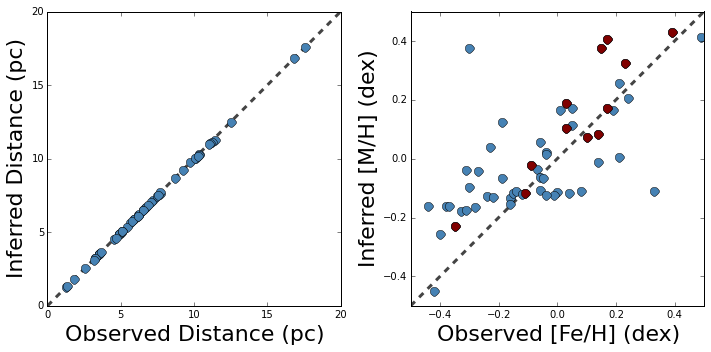

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# distance recovery diagnostic
distance_limits = (0.0, 20.0)
ax[0].set_xlabel('Observed Distance (pc)', fontsize=22.)
ax[0].set_ylabel('Inferred Distance (pc)', fontsize=22.)
ax[0].set_xlim(distance_limits)
ax[0].set_ylim(distance_limits)
ax[0].plot(distance_limits, distance_limits, '--', lw=3, color="#444444")
ax[0].plot(1.0/data[:, 20], data[:, 4], 'o', markersize=9.0, color='#4682B4')

# metallicity recovery diagnostic
quoted_err = np.array([x for x in data if x[31] > 0.0])

FeH_limits = (-0.5, 0.5)
ax[1].set_xlabel('Observed [Fe/H] (dex)', fontsize=22.)
ax[1].set_ylabel('Inferred [M/H] (dex)', fontsize=22.)
ax[1].set_xlim(FeH_limits)
ax[1].set_ylim(FeH_limits)
ax[1].plot(FeH_limits, FeH_limits, '--', lw=3, color="#444444")
ax[1].plot(data[:, 30], data[:, 1], 'o', markersize=9.0, color='#4682B4')
ax[1].plot(quoted_err[:, 30], quoted_err[:, 1], 'o', markersize=9.0, color='#800000')

# auto-adjust subplot spacing
fig.tight_layout()

Distance are well recovered, as anticipated. Metallicities are scattered about the zero-point with perhaps a tendency for predicting systematically higher metallicities between $-0.40$ and $-0.20$ dex. Typical scatter appears to be around $\pm0.2$ dex, consistent with the assumed metallicities uncertainty. Points in red are those that have a measured metallicity uncertainty. In general, those metallicities are better recovered, perhaps owing to tighter constraints.

Define relative errors and errors normalized to observational unceratinties.

In [3]:
# relative errors
dTheta = (data[:,18] - data[:,8])/data[:,18]
dTeff  = (data[:,24] - 10**data[:,6])/data[:,24]
dFbol  = (data[:,22] - 10**(data[:,7]+ 8.0))/data[:,22]

# uncertainty normalized errors
dTheta_sigma = (data[:,18] - data[:,8])/data[:,19]
dTeff_sigma  = (data[:,24] - 10**data[:,6])/data[:,25]
dFbol_sigma  = (data[:,22] - 10**(data[:,7] + 8.0))/data[:,23]

Recovery of observed fundamental properties.

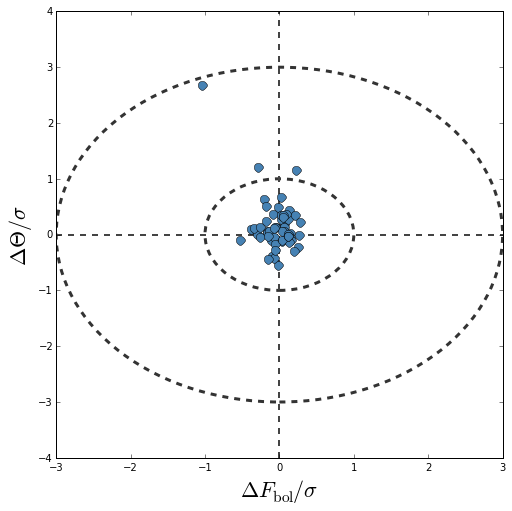

In [4]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# set axis labels
ax.set_xlabel('$\\Delta F_{\\rm bol} / \\sigma$', fontsize=22.)
ax.set_ylabel('$\\Delta \\Theta / \\sigma$', fontsize=22.)
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-4.0, 4.0)

# plot 68% and 99% confidence intervals
ells = [Ellipse(xy=(0.0, 0.0), width=2.*x, height=2.*x, angle=0.0, lw=3, fill=False, 
                linestyle='dashed', edgecolor='#333333') for x in [1.0, 3.0]]
for e in ells:
    ax.add_artist(e)

# plot recovery diagnostics (uncertainty normalized errors)
ax.plot([-3.0, 3.0], [ 0.0, 0.0], '--', lw=2, color="#444444")
ax.plot([ 0.0, 0.0], [-4.0, 4.0], '--', lw=2, color="#444444")
ax.plot(dFbol_sigma, dTheta_sigma, 'o', markersize=9.0, color='#4682B4')

There is considerably better recovery of stellar fundamental properties once variations in helium abundance and the convective mixing length parameter are permitted. All points, with the exception of one, lie within the 99% confidence interval. We can explore whether systematic errors still remain in the sample, although from the above figure we can gather that such systematic effects may be small.

First as a function of bolometric flux and angular diameter,

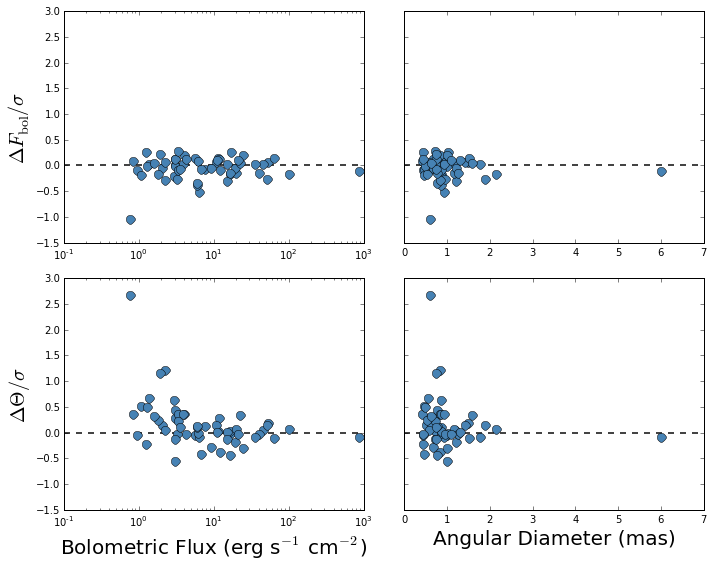

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=True)

ax[1, 0].set_xlabel('Bolometric Flux (erg s$^{-1}$ cm$^{-2}$)', fontsize=20.)
ax[1, 1].set_xlabel('Angular Diameter (mas)', fontsize=20.)
ax[1, 0].set_ylabel('$\\Delta \\Theta / \\sigma$', fontsize=20.)
ax[0, 0].set_ylabel('$\\Delta F_{\\rm bol} / \\sigma$', fontsize=20.)

# vs bolometric flux
ax[0, 0].semilogx([0.1, 1.0e3], [0.0, 0.0], '--', lw=2, color='#444444')
ax[1, 0].semilogx([0.1, 1.0e3], [0.0, 0.0], '--', lw=2, color='#444444')
ax[0, 0].semilogx(data[:, 22], dFbol_sigma, 'o', markersize=9.0, color='#4682B4')
ax[1, 0].semilogx(data[:, 22], dTheta_sigma, 'o', markersize=9.0, color='#4682B4')

# vs angular diameter
ax[0, 1].plot([0.0, 7.0], [0.0, 0.0], '--', lw=2, color='#444444')
ax[1, 1].plot([0.0, 7.0], [0.0, 0.0], '--', lw=2, color='#444444')
ax[0, 1].plot(data[:, 18], dFbol_sigma, 'o', markersize=9.0, color='#4682B4')
ax[1, 1].plot(data[:, 18], dTheta_sigma, 'o', markersize=9.0, color='#4682B4')

fig.tight_layout()

There is a rise of the average error as one moves toward lower bolometric fluxes and smaller angular diameters. These points are effectively all M dwarfs. This illustrates, quite well, that problems for the lowest mass stars are most resiliant to variations in stellar model input parameters, thus preserving the trends present in the data where $\alpha_{MLT}$ and $Y_i$ are fixed. The growth of the trend is therefore attributable to the model's steadily increasing resistance to change resulting from modifications to input parameters.

As a function of stellar mass and effective temperature,

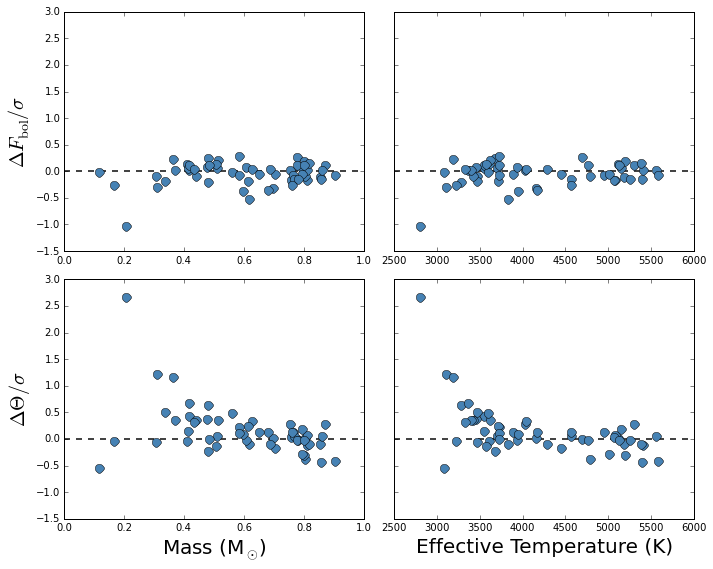

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=False, sharey=True)

ax[1, 0].set_xlabel('Mass (M$_{\\odot}$)', fontsize=20.)
ax[1, 1].set_xlabel('Effective Temperature (K)', fontsize=20.)
ax[1, 0].set_ylabel('$\\Delta \\Theta / \\sigma$', fontsize=20.)
ax[0, 0].set_ylabel('$\\Delta F_{\\rm bol} / \\sigma$', fontsize=20.)

# vs mass
ax[0, 0].plot([0.0, 1.0], [0.0, 0.0], '--', lw=2, color='#444444')
ax[1, 0].plot([0.0, 1.0], [0.0, 0.0], '--', lw=2, color='#444444')
ax[0, 0].plot(data[:, 0], dFbol_sigma, 'o', markersize=9.0, color='#4682B4')
ax[1, 0].plot(data[:, 0], dTheta_sigma, 'o', markersize=9.0, color='#4682B4')

# vs effective temperature
ax[0, 1].plot([2500., 6000.], [0.0, 0.0], '--', lw=2, color='#444444')
ax[1, 1].plot([2500., 6000.], [0.0, 0.0], '--', lw=2, color='#444444')
ax[0, 1].plot(data[:,24], dFbol_sigma, 'o', markersize=9.0, color='#4682B4')
ax[1, 1].plot(data[:,24], dTheta_sigma, 'o', markersize=9.0, color='#4682B4')

fig.tight_layout()

These figures nicely illustrate the aforementioned phenomenon that models grow increasingly resiliant to variations in input parameters as stellar mass (and effective temperature) decreases. Note that it should be possible to quantify the significance of any potential rising trend toward lower masses or temperatures with statistical tests, if one so desires.

For the moment, we can look how the tunable parameters vary. Starting with helium abundance,

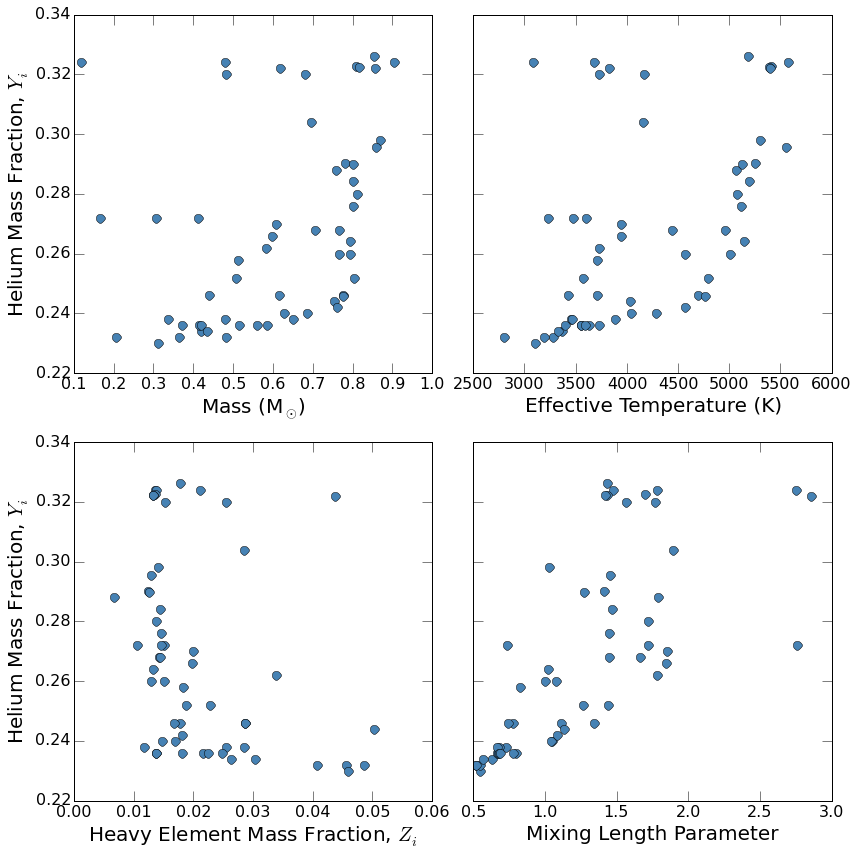

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

ax[0, 0].set_xlabel('Mass (M$_{\\odot}$)', fontsize=20.)
ax[0, 1].set_xlabel('Effective Temperature (K)', fontsize=20.)
ax[1, 0].set_xlabel('Heavy Element Mass Fraction, $Z_i$', fontsize=20.)
ax[1, 1].set_xlabel('Mixing Length Parameter', fontsize=20.)
ax[1, 0].set_ylabel('Helium Mass Fraction, $Y_i$', fontsize=20.)
ax[0, 0].set_ylabel('Helium Mass Fraction, $Y_i$', fontsize=20.)

for x in ax:
    for y in x:
        y.tick_params(which='major', axis='both', length=10., labelsize=16.)

Z_init = (1.0 - data[:, 2])/(10.0**(-1.0*(data[:, 1] + np.log10(0.026579))) + 1.0)        

# Helium abundance variation
ax[0, 0].plot(data[:, 0], data[:, 2], 'o', markersize=9.0, color='#4682B4')
ax[1, 0].plot(Z_init,     data[:, 2], 'o', markersize=9.0, color='#4682B4')
ax[0, 1].plot(data[:,24], data[:, 2], 'o', markersize=9.0, color='#4682B4')
ax[1, 1].plot(data[:, 5], data[:, 2], 'o', markersize=9.0, color='#4682B4')

fig.tight_layout()

Should probably provide some analysis.

Now we can look at the mixing length parameter,

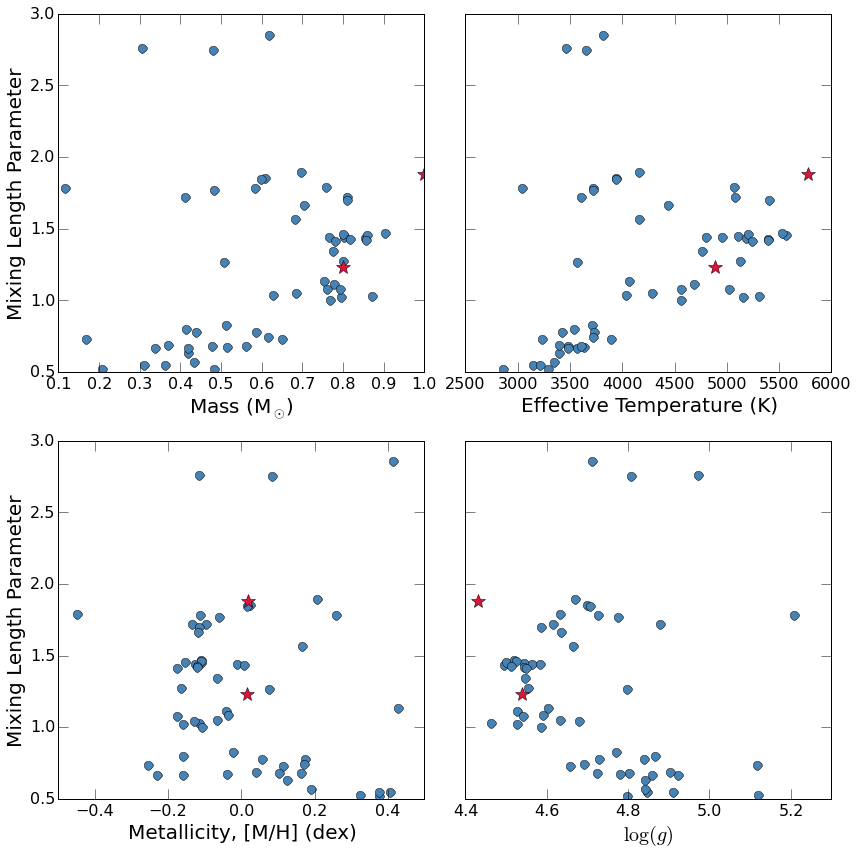

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12), sharey=True)

ax[0, 0].set_xlabel('Mass (M$_{\\odot}$)', fontsize=20.)
ax[0, 1].set_xlabel('Effective Temperature (K)', fontsize=20.)
ax[1, 0].set_xlabel('Metallicity, [M/H] (dex)', fontsize=20.)
ax[1, 1].set_xlabel('$\\log (g)$', fontsize=20.)
ax[1, 0].set_ylabel('Mixing Length Parameter', fontsize=20.)
ax[0, 0].set_ylabel('Mixing Length Parameter', fontsize=20.)

for x in ax:
    for y in x:
        y.tick_params(which='major', axis='both', length=10., labelsize=16.)

Log_g  = np.log10(6.67e-8*data[:,0]*1.989e33/(data[:,26]*6.956e10)**2)

# mixing length parameter variation
ax[0, 0].plot(data[:, 0], data[:, 5], 'o', markersize=9.0, color='#4682B4')
ax[1, 0].plot(data[:, 1], data[:, 5], 'o', markersize=9.0, color='#4682B4')
ax[0, 1].plot(10**data[:, 6], data[:, 5], 'o', markersize=9.0, color='#4682B4')
ax[1, 1].plot(Log_g,      data[:, 5], 'o', markersize=9.0, color='#4682B4')

# points of reference (Sun, HD 189733)
ax[0, 0].plot([1.0, 0.80], [1.884, 1.231], '*', markersize=15.0, color='#DC143C')
ax[0, 1].plot([5778., 4883.], [1.884, 1.231], '*', markersize=15.0, color='#DC143C')
ax[1, 0].plot([0.01876, 0.01614], [1.884, 1.231], '*', markersize=15.0, color='#DC143C')
ax[1, 1].plot([4.43, 4.54], [1.884, 1.231], '*', markersize=15.0, color='#DC143C')

fig.tight_layout()

__NOTE__: values for the Sun plotted above are drawn from our solar-calibrated model.

We can also compare how the inferred mixing length compares to those that are the result of extrapolating the Bonaca et al. ([2012, ApJL, 755, L12](http://adsabs.harvard.edu/abs/2012ApJ...755L..12B)) relation. The latter is valid for stars with $3.8 \le \log(g) \le 4.5$, $5000 \le T_{\rm eff} \le 6700$ K, and $-0.65 \le \textrm{[Fe/H]} \le +0.35$, but here we extrapolate to see how the mixing length parameter might evolve toward cooler temperatures. 

In [9]:
B12_coeffs = [-12.77, 0.54, 3.18, 0.52]  # from Table 1: Trilinear analysis
B12_alphas = B12_coeffs[0] + B12_coeffs[1]*Log_g + B12_coeffs[2]*data[:,6] + B12_coeffs[3]*data[:,1]

Now plot the Bonaca et al values against those we derived,

<Container object of 3 artists>

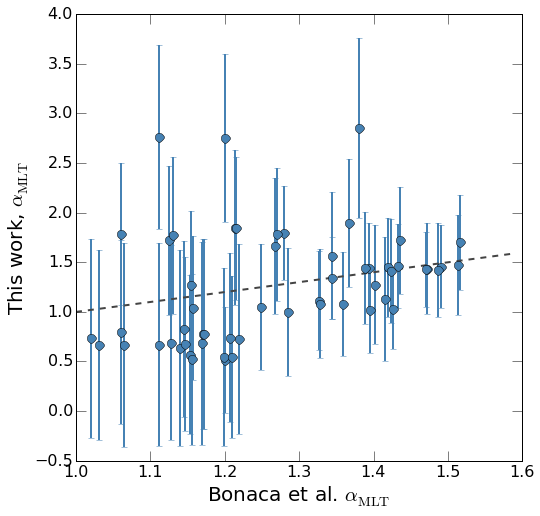

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.set_xlabel('Bonaca et al. $\\alpha_{\\rm MLT}$', fontsize=20.)
ax.set_ylabel('This work, $\\alpha_{\\rm MLT}$', fontsize=20.)
ax.tick_params(which='major', axis='both', length=10., labelsize=16.)

# one-to-one relation
ax.plot([1.0, 1.59], [1.0, 1.59], '--', lw=2, color='#444444')

# compare values
ax.errorbar(B12_alphas, data[:,5], yerr=data[:,14], fmt='o', lw=2, markersize=9.0, color='#4682B4')

Quite surprisingly, there is some agreement in the range of $\alpha_{\rm MLT} \approx 1.5$, but below that value, our models tend to prefer slightly lower mixing lengths. There is then a sharp decrease for the lowest mass stars, as the mixing length parameter plummets. Once one includes errors (roughly $\pm 0.4$), there is rough agreement for most stars with temperatures above 4000 K. Stars for which we find $\alpha_{\rm MLT} \sim 0.5$ actually represent upper limits, with models prefering to push below what is permitted by the model grid.

Stars for which we derive $\alpha_{\rm MLT} \sim 3.0$ may actually require lower values, in reality. Many of these tend to have a fairly flat probability distribution, with some small local maximums. Indeed, it is often just as likely that those stars have $\alpha_{\rm MLT} \sim 0.5$, consistent with other similar stars. We do not assign great confidence to the derivation of $\alpha_{\rm MLT} \sim 3.0$, but for a single star, where there is a clear peak in the posterior distribution.